# Netflix Customer Churn dataset

data: https://www.kaggle.com/datasets/abdulwadood11220/netflix-customer-churn-dataset

*Please, before use download kaggle API TOKEN*

In [1]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kaggle.api.kaggle_api_extended import KaggleApi
import os

# Machine learning libraries
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, classification_report,
                             confusion_matrix, roc_curve)

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)
print(plt.style.available)
plt.style.use('dark_background')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


### Import Dataset

In [2]:
api = KaggleApi()
api.authenticate()

# Download and unzip the data
api.dataset_download_files('abdulwadood11220/netflix-customer-churn-dataset', path='data', unzip=True)

# Load dataset
notebook_dir = os.getcwd()
file_path = os.path.join(notebook_dir, 'data/netflix_customer_churn.csv')

df = pd.read_csv(file_path)

# Head
df.head()

Dataset URL: https://www.kaggle.com/datasets/abdulwadood11220/netflix-customer-churn-dataset


,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


### Inspect

In [3]:
# Types, null, memory
print('INFO: \n ', df.info())

# Descritive statistics
print('Descritive: \n ', df.describe())

# types
print('TYPES: \n ', df.dtypes)

# Unique values
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

### Cleaning Data

In [4]:
# 3.1 Handle missing values
print("Missing values per column:\n", df.isna().sum())

# 3.2 Correct data types
df['churned'] = df['churned'].astype(int)
df['last_login_days'] = pd.to_numeric(df['last_login_days'], errors='coerce')

# 3.3 Remove duplicates
df.drop_duplicates(subset='customer_id', inplace=True)

# 3.4 Feature creation
df['watch_per_login'] = df['watch_hours'] / (df['last_login_days'] + 1)

Missing values per column:
 customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64


## EDA (Exploratory Data Analysis)

**Exploratory Data Analysis** is the process of summarizing and visualizing your dataset using statistics, plots and charts to uncover underlying patterns, detect anomalies, spot correlations and formulate hypotheses.

> **Objective:**  
> 1. **Understand the data’s structure** and distribution before modeling.  
> 2. **Identify potential issues** (missing values, outliers, collinearity) and guide subsequent feature engineering and modeling decisions.  


Churn


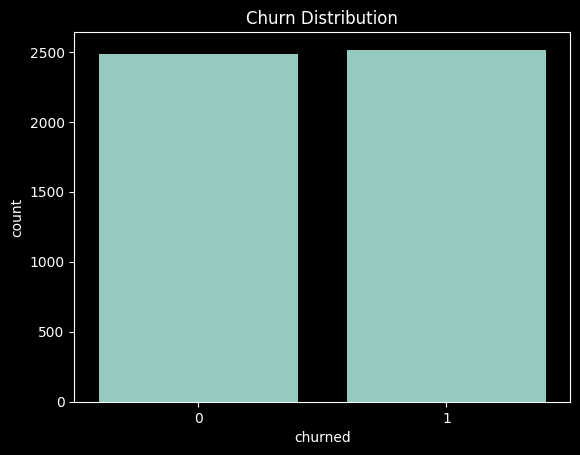

Distribution Numeric Variables


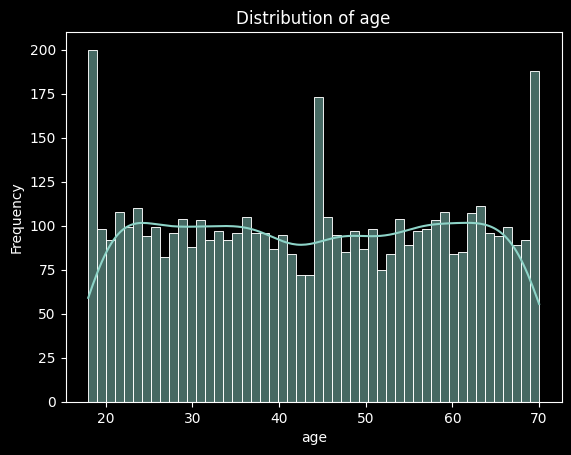

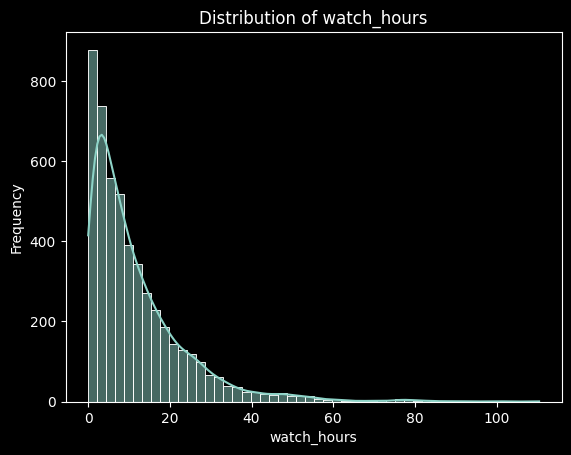

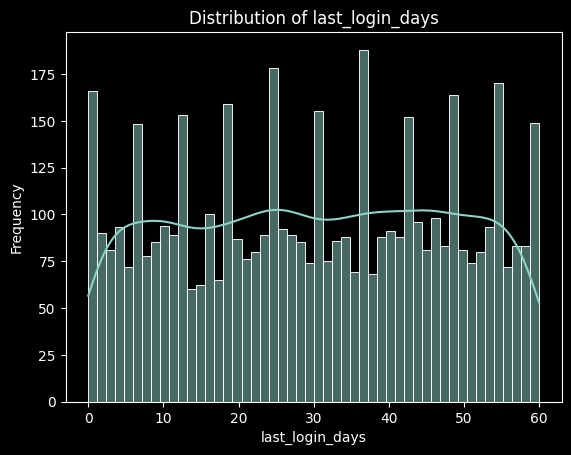

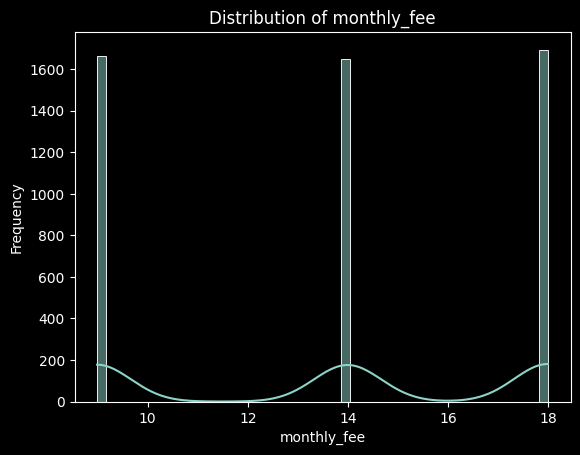

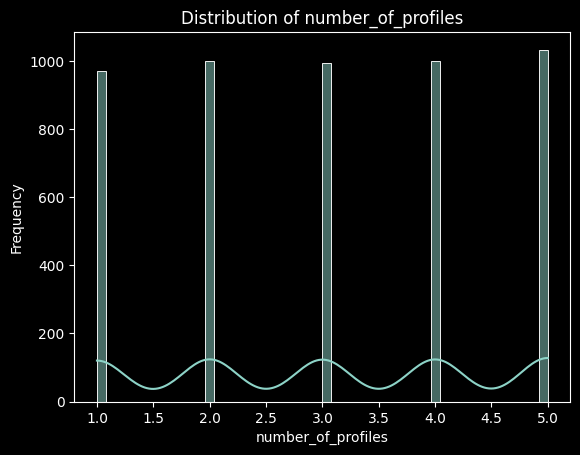

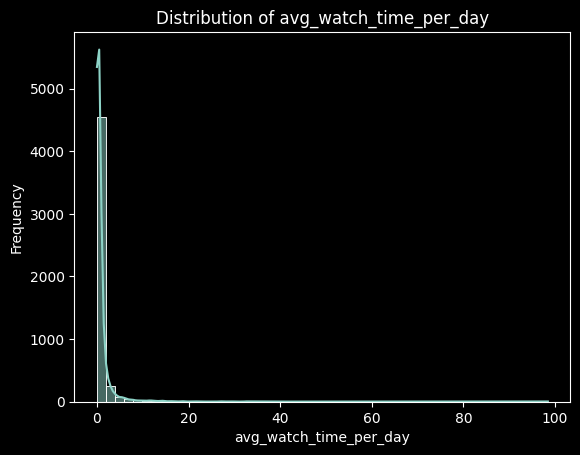

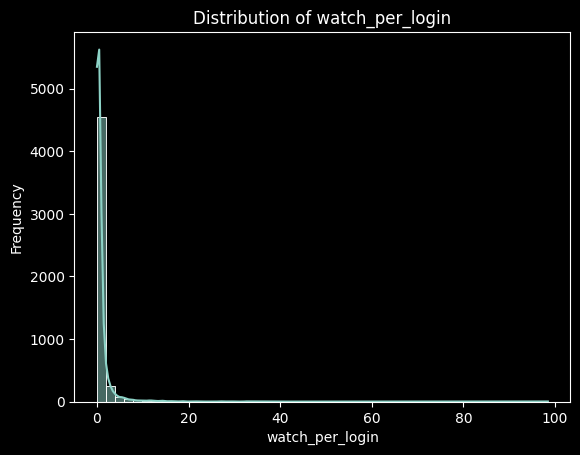

Categorical Columns analysis (Churn)


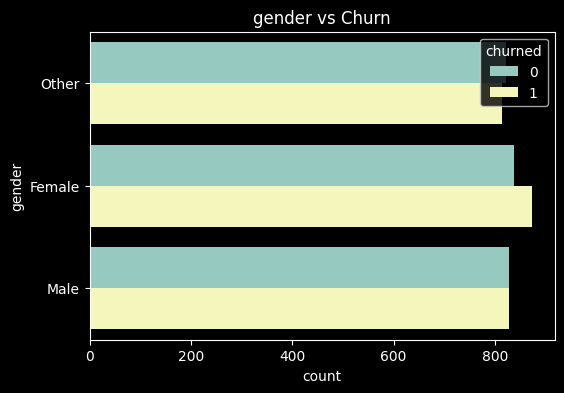

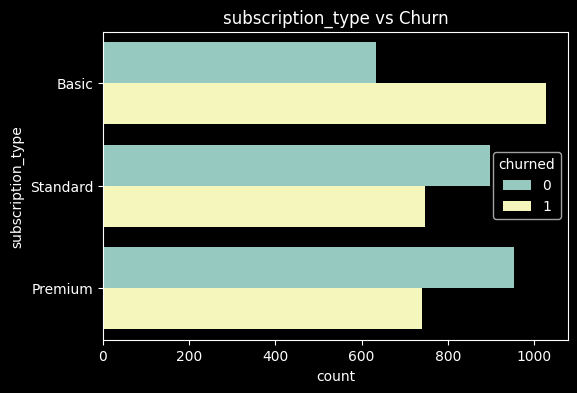

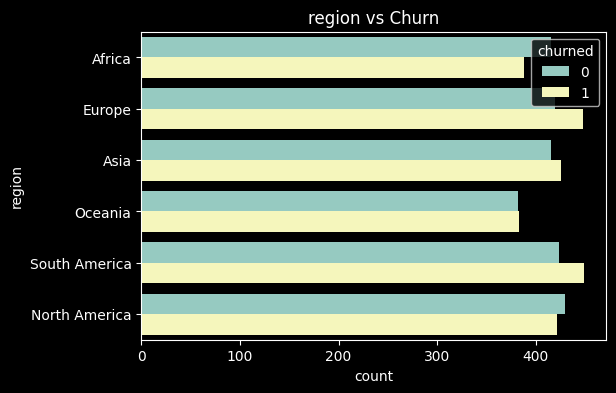

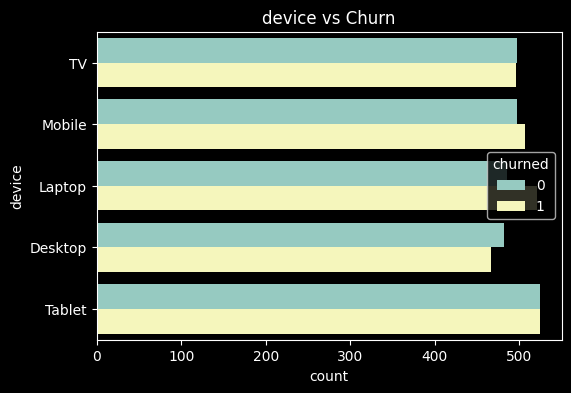

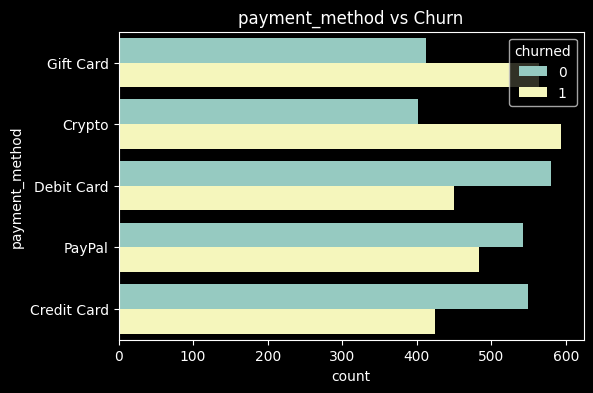

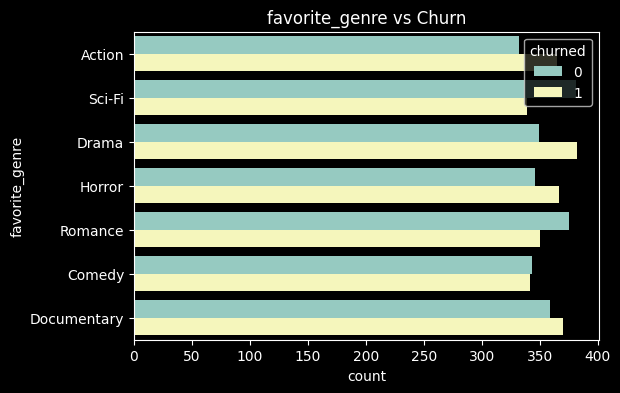

Correlation Map


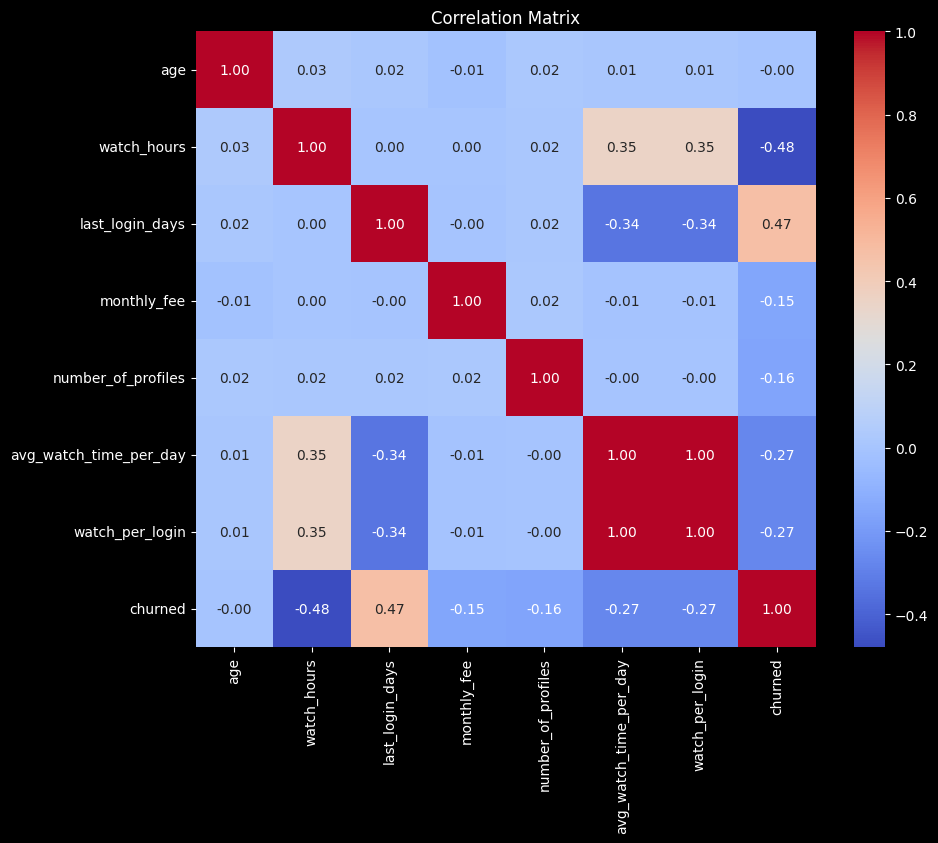

Pairplot by Churn


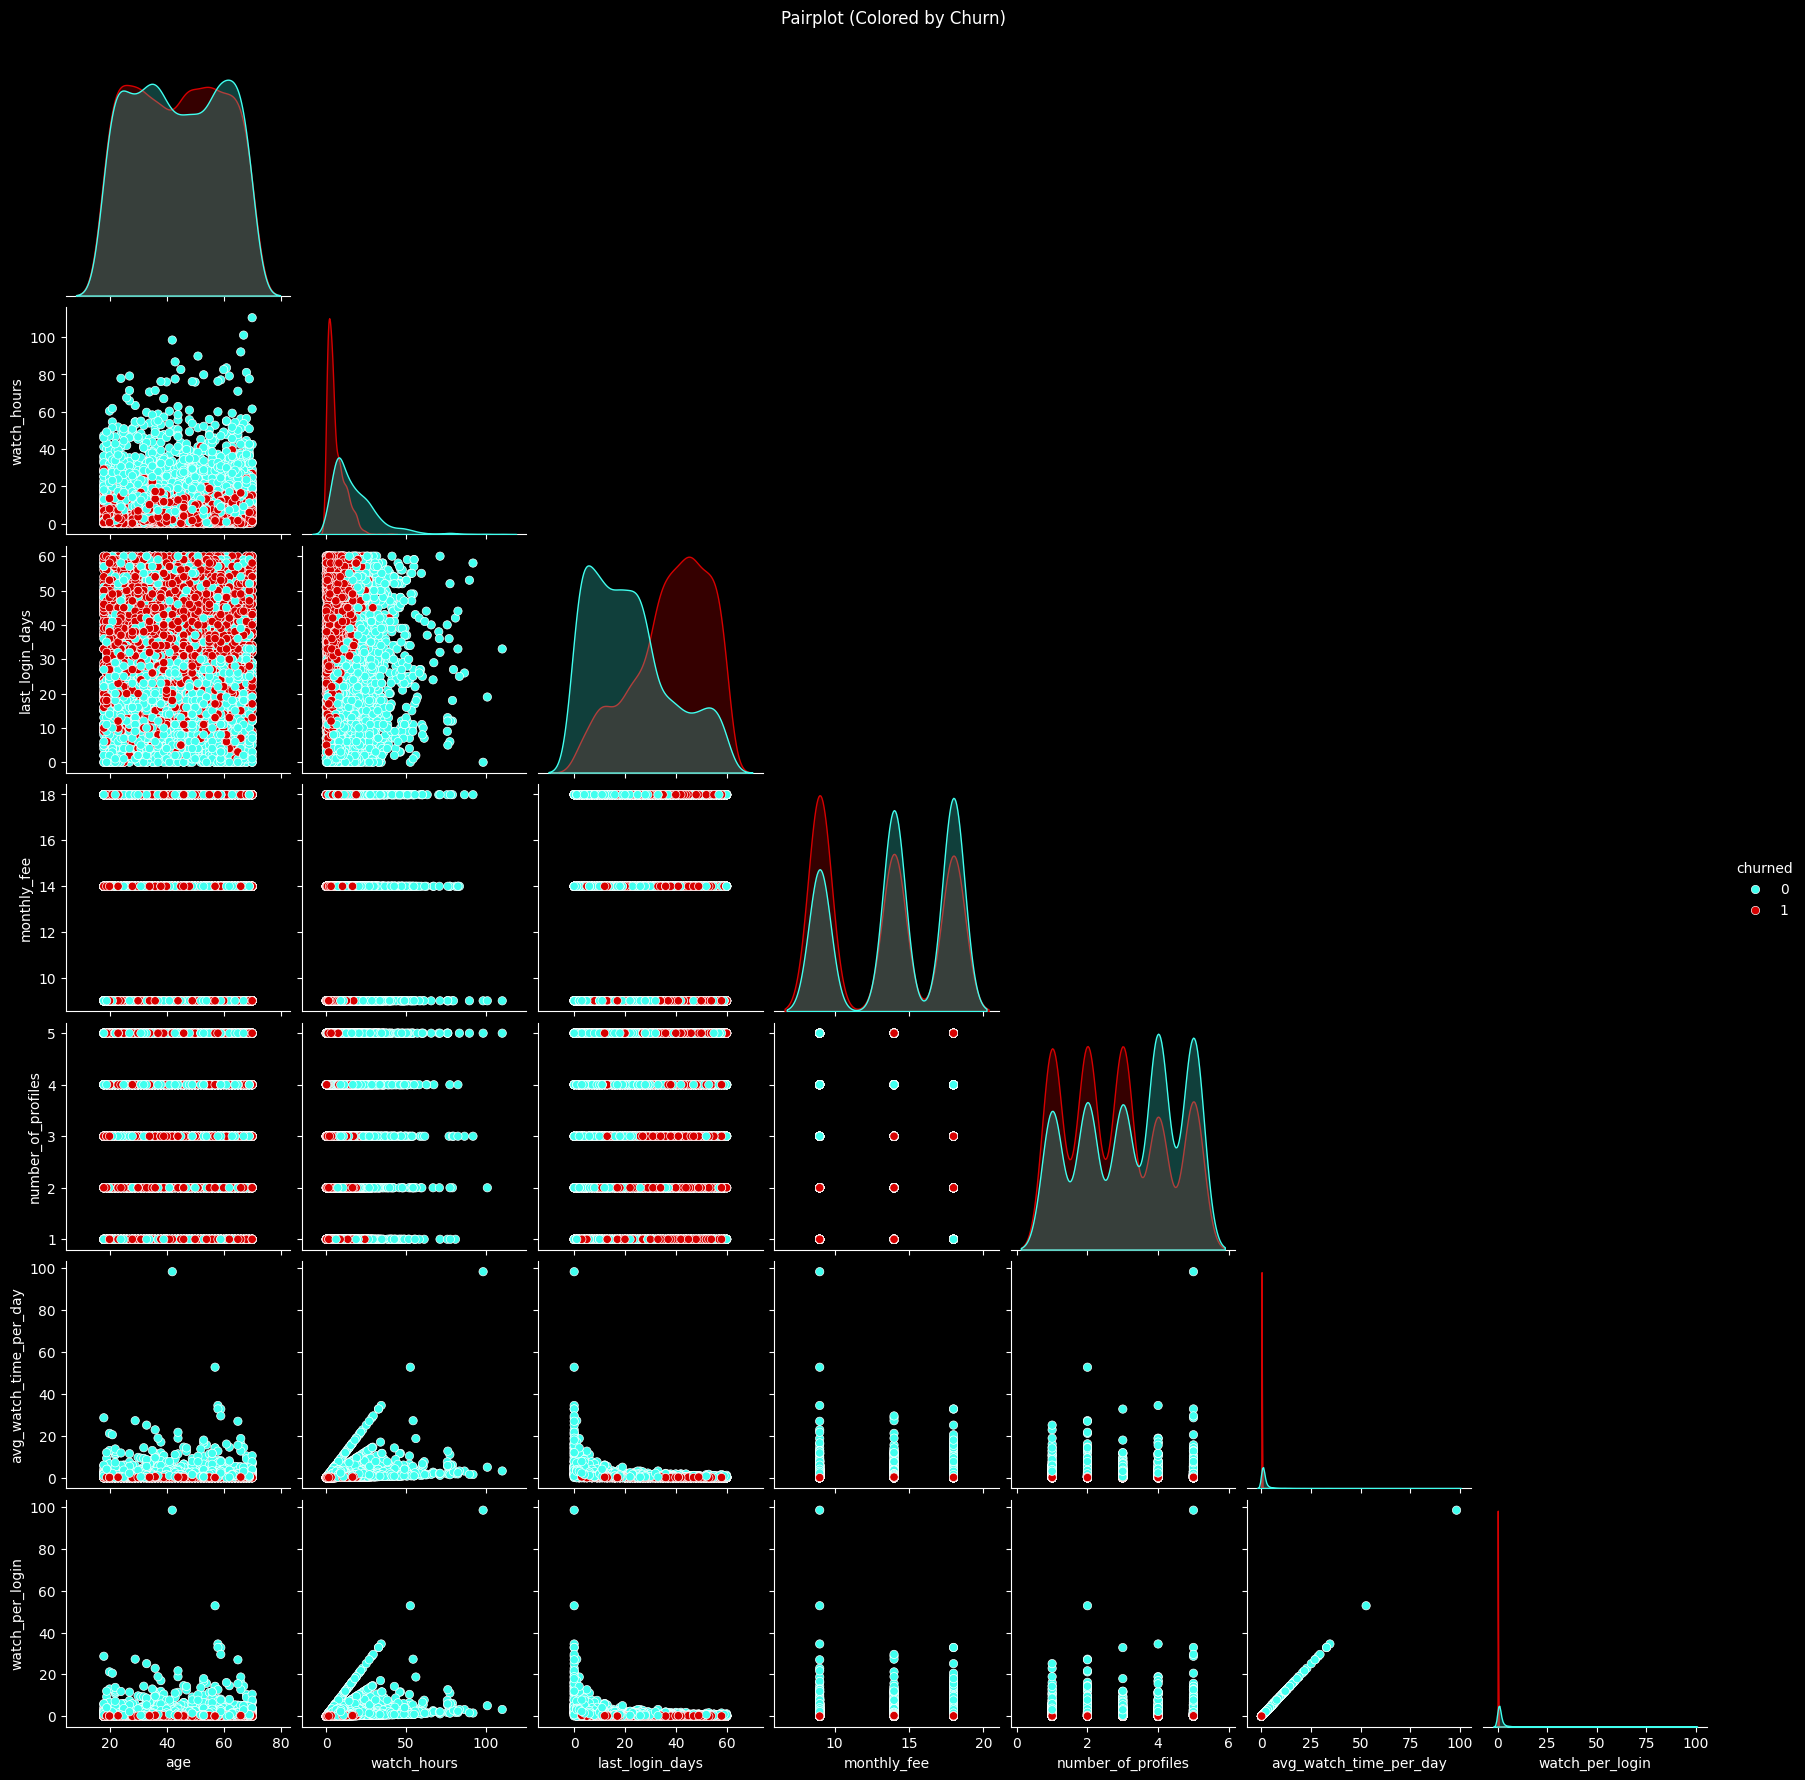

In [5]:
df.describe()

num_cols = ['age', 'watch_hours', 'last_login_days', 'monthly_fee', 'number_of_profiles', 'avg_watch_time_per_day', 'watch_per_login']
cat_cols = ['gender', 'subscription_type', 'region', 'device', 'payment_method', 'favorite_genre']

# Churn

print('Churn')

sns.countplot(x='churned', data=df)
plt.title('Churn Distribution')
plt.show()

print('Distribution Numeric Variables')

# Histograms
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

print('Categorical Columns analysis (Churn)')

# Categorical Columns analysis (Churn)
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(y=col, hue='churned', data=df)
    plt.title(f'{col} vs Churn')
    plt.show()

print('Correlation Map')

# Correlation Map
corr = df[num_cols + ['churned']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot by Churn

print('Pairplot by Churn')

sns.pairplot(df[num_cols + ['churned']], hue='churned', diag_kind='kde', corner=True, palette={0: "#40ffef", 1: "#d60000"})
plt.suptitle("Pairplot (Colored by Churn)", y=1.02)
plt.show()


### Churn rate by Categories

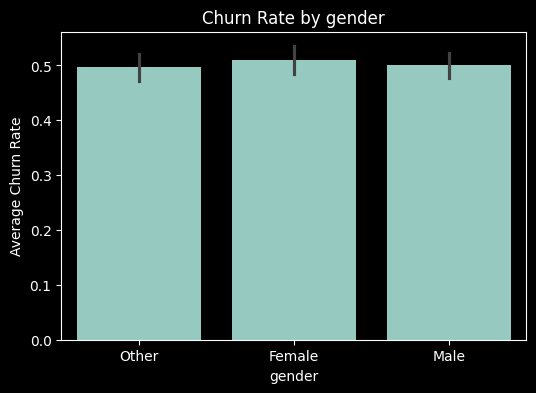

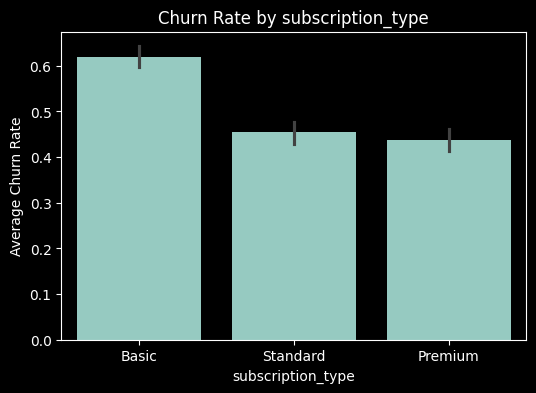

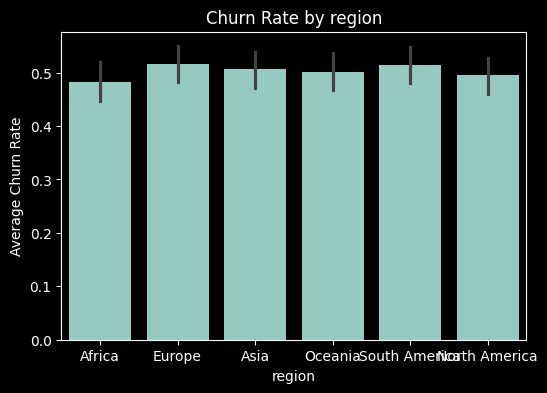

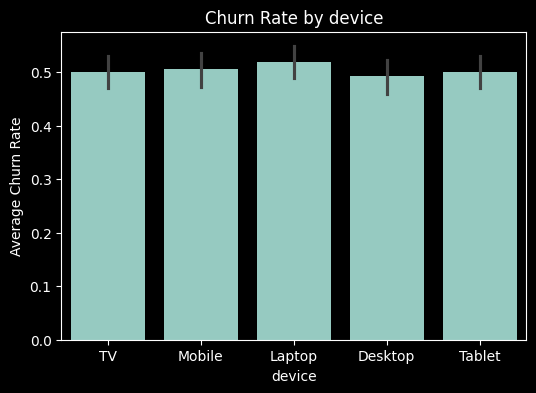

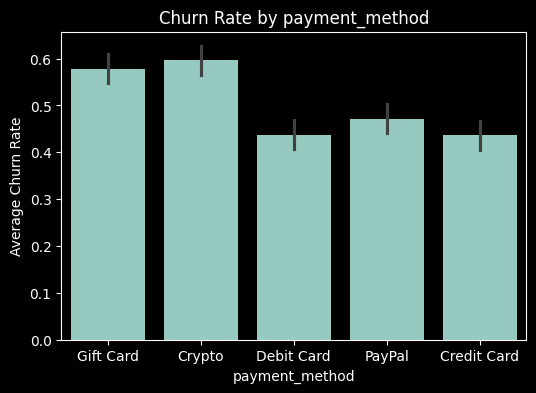

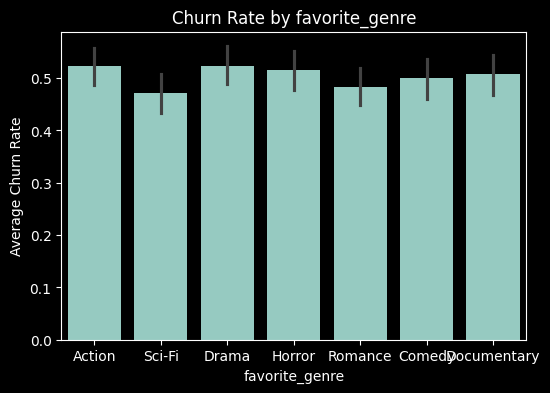

In [14]:
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=col, y='churned', data=df)
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Average Churn Rate")
    plt.show()

### Outlier detection

*Important*: Dectect the outilier and threat the data before the normalization to ensure that the normalization process is effective and does not propagate errors or inconsistencies

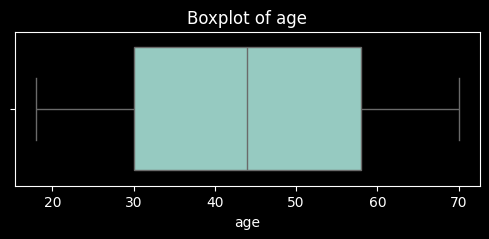

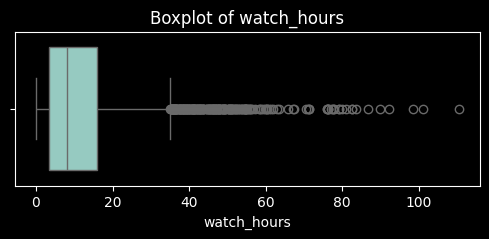

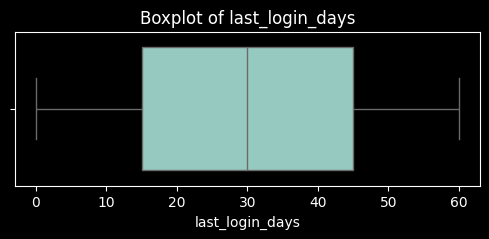

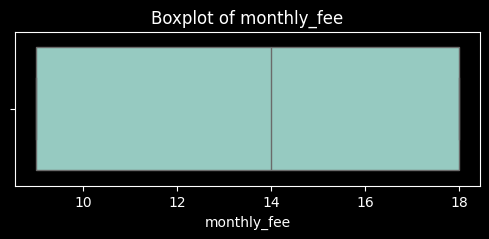

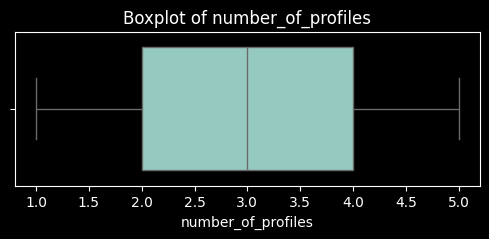

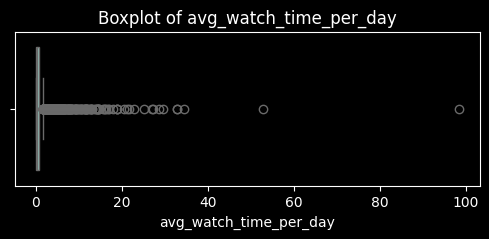

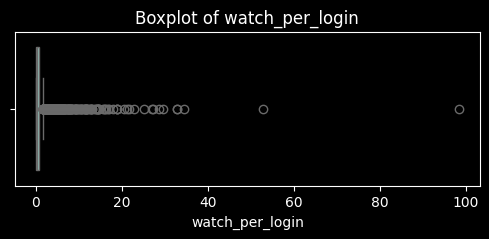

In [6]:
for col in num_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

## ML Modeling

**ML Modeling** involves selecting, training and evaluating machine learning algorithms such as logistic regression, decision trees or ensemble methods on your prepared data to learn patterns that predict your target variable.  

> **Objective:**  
> 1. **Build predictive models** that generalize well to new data.  
> 2. **Assess performance** using metrics like accuracy, AUC or F1-score to ensure reliability before deployment.  


#### Normalizing and Encoding

In [8]:
X = df.drop(columns=['customer_id', 'churned'])
y = df['churned'] # Target

numeric_features = ['age', 'watch_hours', 'last_login_days', 'monthly_fee', 'number_of_profiles', 'avg_watch_time_per_day', 'watch_per_login']
categorical_features = ['gender', 'subscription_type', 'region', 'device', 'payment_method', 'favorite_genre']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

##### How is the data after Normalizing and Encoding?

In [9]:
# Fit e transformation
X_transformed = preprocessor.fit_transform(X)

# Getting back the name of the features
cat_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_feature_names = cat_encoder.get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numeric_features, cat_feature_names])

# Visualization
X_transformed_df = pd.DataFrame(X_transformed, columns=all_feature_names)
X_transformed_df.head()

,age,watch_hours,last_login_days,monthly_fee,number_of_profiles,avg_watch_time_per_day,watch_per_login,gender_Male,gender_Other,subscription_type_Premium,subscription_type_Standard,region_Asia,region_Europe,region_North America,region_Oceania,region_South America,device_Laptop,device_Mobile,device_TV,device_Tablet,payment_method_Crypto,payment_method_Debit Card,payment_method_Gift Card,payment_method_PayPal,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
0,0.4615,0.2564,-0.0622,-1.2713,-1.4300,-0.1469,-0.1465,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.2034,-0.9114,-0.6325,0.0831,1.3955,-0.3225,-0.3206,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.0870,0.3888,-1.1457,0.0831,-0.7236,0.2310,0.2325,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.5905,-0.5943,-1.0317,1.1666,-0.7236,-0.2003,-0.2015,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.7841,-0.8124,-0.9746,0.0831,-0.7236,-0.2843,-0.2824,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Best Params

In [10]:
def build_model(clf):
    return Pipeline(steps=[('preprocessor', preprocessor), ('classifier', clf)])

log_pipe = build_model(LogisticRegression(max_iter=1000, random_state=42))
rf_pipe = build_model(RandomForestClassifier(random_state=42))

param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10]
}
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20]
}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gs_lr = GridSearchCV(log_pipe, param_grid_lr, cv=kf, scoring='roc_auc', n_jobs=-1)
gs_rf = GridSearchCV(rf_pipe, param_grid_rf, cv=kf, scoring='roc_auc', n_jobs=-1)

gs_lr.fit(X, y)
gs_rf.fit(X, y)

print(f"Best LR params: {gs_lr.best_params_}, AUC: {gs_lr.best_score_:.4f}")
print(f"Best RF params: {gs_rf.best_params_}, AUC: {gs_rf.best_score_:.4f}")


Best LR params: {'classifier__C': 10}, AUC: 0.9678
Best RF params: {'classifier__max_depth': 20, 'classifier__n_estimators': 200}, AUC: 0.9968


### Training and Evaluating

The best model is Random Forest
Accuracy: 0.977
Precision: 0.9780876494023905
Recall: 0.9761431411530815
F1 Score: 0.9771144278606965
ROC AUC: 0.9961018596669481

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       497
           1       0.98      0.98      0.98       503

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



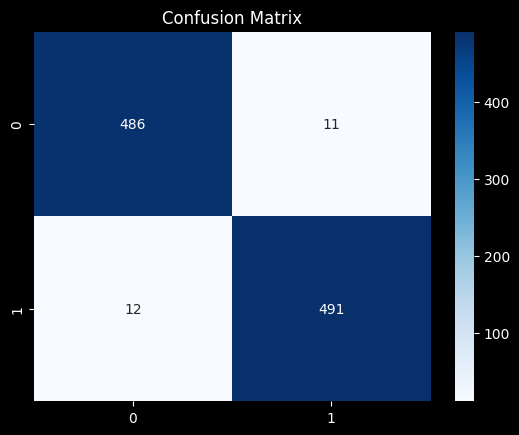

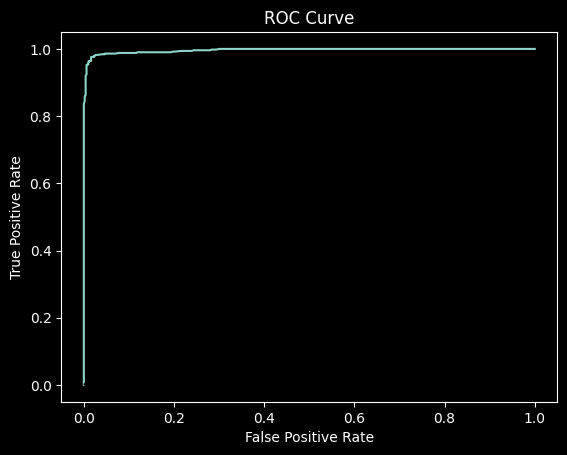

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Checking the best model

if gs_rf.best_score_ > gs_lr.best_score_:
    best_model = gs_rf
    print('The best model is Random Forest')
else:
    best_model = gs_lr
    print('The best model is Logistic Regression')


best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

def print_metrics(y_true, y_pred, y_proba):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("ROC AUC:", roc_auc_score(y_true, y_proba))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

    fpr, tpr, _ = roc_curve(y_true, y_proba)
    plt.plot(fpr, tpr)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

print_metrics(y_test, y_pred, y_proba)

## Hypothesis Testing & A/B Testing

**Hypothesis Testing** uses statistical tests (t‑tests, chi‑squared, ANOVA) to determine whether observed differences or relationships in your data are real or due to random chance.  
**A/B Testing** applies hypothesis testing to compare two or more versions of a feature such as UI layouts or pricing plans by randomly assigning users to each variant and measuring performance metrics (e.g., conversion, churn).  

> **Objective:**  
> 1. **Validate assumptions** and quantify the impact of changes with statistical confidence.  
> 2. **Guide data‑driven decisions** on product features, pricing or marketing strategies by comparing control and treatment groups.  


In [12]:
# Chi-squared (Categorical): 

# Churn by payment method
contingency = pd.crosstab(df['payment_method'], df['churned'])
chi2, p, dof, _ = chi2_contingency(contingency)
print("Chi-squared test for churn vs payment_method")
print("Chi2 =", chi2, " | p-value =", p)

# Region by Churn 
contingency = pd.crosstab(df['region'], df['churned'])
chi2, p, dof, _ = chi2_contingency(contingency)
print("\nChi-squared test for region vs churn")
print("Chi2 =", chi2, " | p-value =", p)


# T-test : 

# Watch hours by churn
group_0 = df[df['churned'] == 0]['watch_hours']
group_1 = df[df['churned'] == 1]['watch_hours']
t, p = ttest_ind(group_0, group_1, equal_var=False)
print("\n📈 T-test: watch_hours (churned vs not)")
print(f"t = {t:.4f} | p-value = {p:.4f}\n")

# Monthly fee by churn
group_0 = df[df['churned'] == 0]['monthly_fee']
group_1 = df[df['churned'] == 1]['monthly_fee']
t, p = ttest_ind(group_0, group_1, equal_var=False)
print("📈 T-test: monthly_fee (churned vs not)")
print(f"t = {t:.4f} | p-value = {p:.4f}\n")

# Last login days by churn 
group_0 = df[df['churned'] == 0]['last_login_days']
group_1 = df[df['churned'] == 1]['last_login_days']
t, p = ttest_ind(group_0, group_1, equal_var=False)
print("📈 T-test: last_login_days (churned vs not)")
print(f"t = {t:.4f} | p-value = {p:.4f}")

Chi-squared test for churn vs payment_method
Chi2 = 96.90692132741091  | p-value = 4.478433118358446e-20

Chi-squared test for region vs churn
Chi2 = 2.6542404393304326  | p-value = 0.7531077652230413

📈 T-test: watch_hours (churned vs not)
t = 38.5023 | p-value = 0.0000

📈 T-test: monthly_fee (churned vs not)
t = 10.8850 | p-value = 0.0000

📈 T-test: last_login_days (churned vs not)
t = -37.7874 | p-value = 0.0000


## Model Tuning & Explainability

**Model Tuning** (Hyperparameter Tuning) is the process of finding the optimal settingssuch as learning rates, tree depths or regularization strengths—that maximize your model’s performance on unseen data.  
**Explainability** involves using techniques like feature importance, SHAP or LIME to reveal which inputs drive each prediction and to ensure your model’s decisions are transparent and trustworthy.  

> **Objective:**  
> 1. **Enhance accuracy and generalization** by systematically adjusting hyperparameters.  
> 2. **Build trust and insight** by interpreting how and why the model makes its predictions, facilitating better decision‑making and stakeholder buy‑in.  


Using feature_importances_ from tree-based model


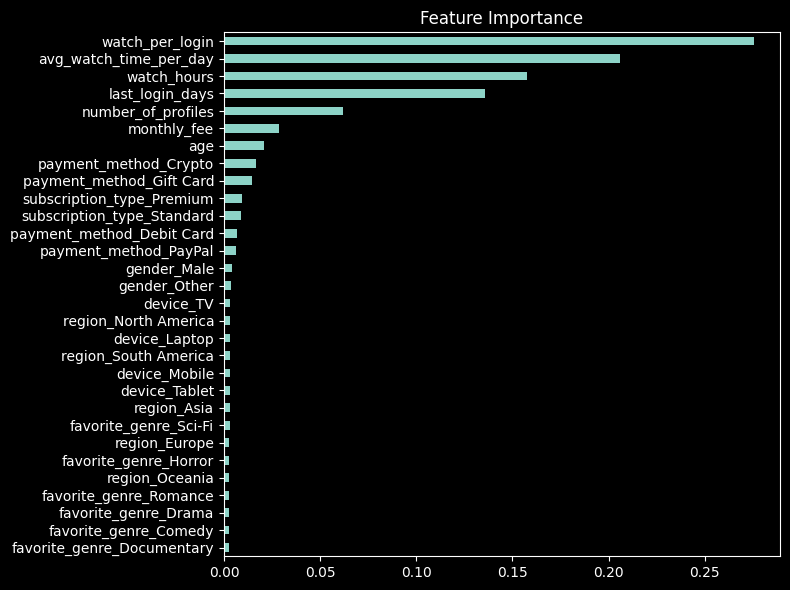

In [13]:
# Final model & feature importance
best_model.fit(X, y)

cat_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_names = cat_encoder.get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numeric_features, cat_names])

# Access the classifier inside the pipeline
classifier = best_model.best_estimator_.named_steps['classifier']

# Feature importance or coefficients, depending on model type
if hasattr(classifier, 'feature_importances_'):
    print("Using feature_importances_ from tree-based model")
    importances = classifier.feature_importances_
    feat_imp = pd.Series(importances, index=all_feature_names).sort_values(ascending=True)

elif hasattr(classifier, 'coef_'):
    print("Using coef_ from linear model")
    importances = classifier.coef_[0]  # For binary classification
    feat_imp = pd.Series(importances, index=all_feature_names).sort_values()

else:
    raise ValueError("This model does not support feature importance or coefficients.")

feat_imp.plot(kind='barh', figsize=(8,6), title='Feature Importance')
plt.tight_layout()
plt.show()

### *Every Data Science Project is Unique*
Each Data Science project is different because it involves:

Unique Data: Every dataset has its own characteristics, such as size, features, quality, and distribution.

Specific Objectives: Projects have different goals from predicting outcomes, finding patterns, to optimizing processes.

Tailored Tools and Techniques: The best methods, algorithms, and preprocessing steps depend on the specific data and the problem being solved.

Because of this, there is no one-size-fits-all approach in Data Science. Success depends on selecting the right tools and techniques tailored to the project's unique needs.

### Additional Tools & Techniques You Could Explore

Below is a (non‑exhaustive) list of useful methods and tools you might consider in future projects. If you’ve already used any of these, feel free to remove them:

1. **Feature Engineering**  
   - Create new features (ratios, date‑based, aggregations, custom transformations) to surface hidden patterns.

2. **Binning Continuous Values**  
   - Discretize numeric variables into categories or quantiles (e.g. age groups, deciles of spend).

3. **Polynomial & Interaction Features**  
   - Generate x², x·y, higher‑order and interaction terms so linear models can capture non‑linear effects.

4. **Missing Value Imputation**  
   - SimpleImputer, KNNImputer or model‑based imputers to fill or predict missing entries.

5. **Outlier Detection & Handling**  
   - Z‑score, IQR filtering, Isolation Forest or Local Outlier Factor to identify and treat anomalies.

6. **Dimensionality Reduction**  
   - PCA, t‑SNE, UMAP, or LDA to project high‑dimensional data into a lower space for visualization or modeling.

7. **Feature Selection**  
   - SelectKBest, Recursive Feature Elimination (RFE), tree‑based importance, or L1 regularization to keep only the most predictive inputs.

8. **Cross‑Validation Strategies**  
    - K‑Fold, StratifiedKFold, TimeSeriesSplit or GroupKFold to reliably estimate model performance under different data‑split scenarios.

9. **Ensemble Methods**  
    - Bagging (Random Forest), Boosting (XGBoost, LightGBM, CatBoost), Stacking or Voting Classifiers to improve accuracy and robustness.

10. **Model Interpretability**  
    - SHAP, LIME, Partial Dependence Plots, or feature importance to explain predictions at both global and local levels.

11. **Clustering & Unsupervised Learning**  
    - K‑Means, DBSCAN, Hierarchical Clustering for customer segmentation or outlier grouping.

12. **Time‑Series Analysis**  
    - Decomposition, ARIMA/SARIMA, Facebook Prophet, rolling statistics for forecasting and trend detection.

13. **Anomaly & Fraud Detection**  
    - Isolation Forest, One‑Class SVM, Local Outlier Factor to flag unusual patterns in transactional or behavioral data.

14. **Natural Language Processing (NLP)**  
    - Tokenization, stop‑word removal, TF‑IDF, word embeddings (Word2Vec, BERT) for any text fields (reviews, comments).

15. **Deep Learning**  
    - Neural networks (MLP, CNN, RNN/LSTM), transfer learning with frameworks like TensorFlow or PyTorch for complex tasks (images, sequences).

16. **Automated Machine Learning (AutoML)**  
    - auto‑sklearn, TPOT, H2O AutoML for rapid prototyping of many models and pipelines.

17. **Advanced Visualization**  
    - Scatter matrix, heatmaps, PCA biplots, t‑SNE/UMAP projections, interactive dashboards (Plotly, Dash, Streamlit) for insights.

---  
> **Tip:** Always choose and tailor these techniques to your data’s nature and your project’s objective—there’s no one‑size‑fits‑all in Data Science!  
